# Machine Learning

**Steps of Machine Learning**

1. Problem definition
2. Data collection
3. Evaluation (What defines success?)
4. Features (What features can we use?)
5. Modelling (What model to use?)
6. Experimentation (How can we improve?)

**Overfitting and Underfitting Definitions**

- **Underfitting**: Poor performance on training data means the model hasn't learned properly and is underfitting. Try a different model, improve the existing one through hyperparameter or collect more data.

- **Overfitting**: Great performance on the training data but poor performance on test data means your model doesn't generalize well. Your model may be overfitting the training data. Try using a simpler model or making sure the test data is of the same style your model is training on.

## Data Science Recap

### Pandas - Data Analysis

- Simple to use
- Integrated with amy other data science and ML Python Tools
- Helps you get your data ready for machine learning

#### Series, Data Frames and CSVs



In [2]:
import pandas as pd

In [3]:
# 2 main datatypes
series = pd.Series(["BMW", "Toyota", "Honda"])
series

#series = 1-dimensional

0       BMW
1    Toyota
2     Honda
dtype: object

In [4]:
colors = pd.Series(["Red", "Blue", "White"])
colors

0      Red
1     Blue
2    White
dtype: object

- The difference between Series and Data Frames is that a Series is a single column of data while a DataFrame is multiple columns of data.

In [5]:
car_data = pd.DataFrame({"Car make": series, "Color": colors})
car_data

,Car make,Color
0,BMW,Red
1,Toyota,Blue
2,Honda,White


In [6]:
# Import data
car_sales = pd.read_csv("data/car-sales.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


- **Anatomy of a DataFrame**: A DataFrame is a two-dimensional data structure where the data is aligned in a tabular fashion in rows and columns.

- `axis=0` refers to rows and `axis=1` refers to columns.

- Indexes are the default row numbers in a DataFrame. It always starts at 0.

In [7]:
#Exporting data frame
car_sales.to_csv('data/exported-car-sales.csv', index=False) #if we don't add index = False, it will add an extra column with the index numbers

In [8]:
exported_car_sales = pd.read_csv('data/exported-car-sales.csv')
exported_car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


#### Describe Data

In [9]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

- Quick note: The main difference between an attribute (which `dtypes` is) and a function is that an attribute is a description of a data structure while a function is an action we can perform.

In [10]:
car_sales.columns
#we can save this attribute as a variable, and then we can use it to access the columns

car_sales_columns = car_sales.columns
car_sales_columns #after changing it to a list, we can manipulate the data

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [11]:
car_sales.index #shows the range of the index (rows)

RangeIndex(start=0, stop=10, step=1)

In [12]:
car_sales.describe() #shows the statistics of the numerical columns
#here sales does not come out, because it is not a numerical column, it is an object

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [13]:
car_sales.info() #shows the data types and the non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [14]:
#car_sales.select_dtypes(include='number').mean() #shows the mean of the numerical columns
car_sales.mean(numeric_only=True) #same as above

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [15]:
car_sales["Doors"].sum()

np.int64(40)

In [16]:
car_sales["Price"].sum()

'$4,000.00$5,000.00$7,000.00$22,000.00$3,500.00$4,500.00$7,500.00$7,000.00$6,250.00$9,700.00'

#### Viewing and Selecting Data

In [17]:
car_sales.head() #shows the first 5 rows

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [18]:
car_sales.tail() #shows the last 5 rows

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [19]:
# .loc and .iloc
animals = pd.Series(["cat", "dog", "bird", "panda", "snake"],
                    index=[0, 3, 9, 8, 3])

In [20]:
#.loc
animals

0      cat
3      dog
9     bird
8    panda
3    snake
dtype: object

In [21]:
animals.loc[3] #loc refers to the index

3      dog
3    snake
dtype: object

In [22]:
animals.loc[9]

'bird'

In [23]:
car_sales.loc[6]

Make                 Honda
Colour                Blue
Odometer (KM)        45698
Doors                    4
Price            $7,500.00
Name: 6, dtype: object

In [24]:
#.iloc refers to the position
animals.iloc[3] #iloc refers to the position

'panda'

In [25]:
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [26]:
#slicing
animals.iloc[:3] #.iloc does not include the last number

0     cat
3     dog
9    bird
dtype: object

In [27]:
car_sales.loc[:3] #.loc includes the last number

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [28]:
car_sales["Make"]

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [29]:
car_sales.Make #this is the same as above
## But if you column name has a space, you can't use the dot notation

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [30]:
car_sales[car_sales["Make"] == "Toyota"] #shows the rows where the make is Toyota

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


In [31]:
pd.crosstab(car_sales["Make"], car_sales["Doors"]) #shows the frequency of the make and the doors

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [32]:
#what if we want to compare more columns in the context of another column
## groupby

car_sales.groupby(["Make"]).mean(numeric_only=True) #shows the mean of the numerical columns, grouped by the make

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


<Axes: >

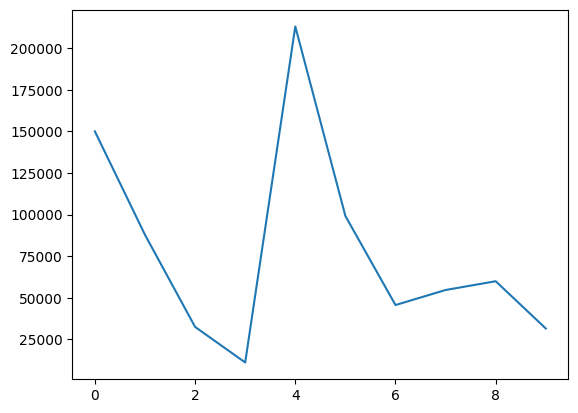

In [33]:
#visualizing data, to get a first glimpse of the data
car_sales["Odometer (KM)"].plot() #shows the plot of the odometer

<Axes: >

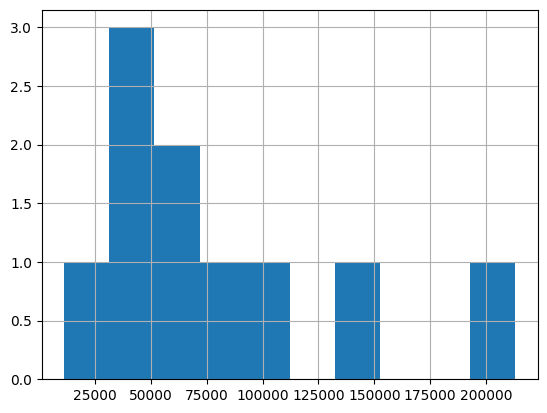

In [34]:
car_sales["Odometer (KM)"].hist() #shows the histogram of the odometer

In [35]:
#to plot the price, we need to change the data type
car_sales["Price"].dtype #it is an object

dtype('O')

In [36]:
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int) #this will remove the $ and the , and change the data type to int

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_36718/447994275.py:1: SyntaxWarning: invalid escape sequence '\$'
  car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int) #this will remove the $ and the , and change the data type to int


In [37]:
car_sales
#with the code above, cents are considered, and it is a bit confusing, so we can divide the price by 100

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [38]:
car_sales["Price"] = car_sales["Price"] / 100
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


#### Manipulating Data

In [39]:
car_sales["Make"].str.lower()
#this will change the make to lower case, but it will not change the original data frame
## we need to re-assign it to the original data frame

0    toyota
1     honda
2    toyota
3       bmw
4    nissan
5    toyota
6     honda
7     honda
8    toyota
9    nissan
Name: Make, dtype: object

In [40]:
car_sales["Make"] = car_sales["Make"].str.lower()

In [41]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,toyota,White,150043,4,4000.0
1,honda,Red,87899,4,5000.0
2,toyota,Blue,32549,3,7000.0
3,bmw,Black,11179,5,22000.0
4,nissan,White,213095,4,3500.0
5,toyota,Green,99213,4,4500.0
6,honda,Blue,45698,4,7500.0
7,honda,Blue,54738,4,7000.0
8,toyota,White,60000,4,6250.0
9,nissan,White,31600,4,9700.0


In [42]:
#Handling missing data
car_sales_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [43]:
#if you do not assign this to a variable, it will not change the original data frame
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(numeric_only=True))

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

In [44]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [45]:
#since it only took inplace, we need to assign it to the original data frame
car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(numeric_only=True))

# or another way is using inplace=True in the function instead of assigning it to the original data frame

#car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(numeric_only=True), inplace=True)

In [46]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [47]:
#we want to drop the rows with missing values
car_sales_missing_dropped = car_sales_missing.dropna()
car_sales_missing_dropped

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [48]:
car_sales_missing_dropped.to_csv("data/car-sales-missing-dropped.csv", index=False)

In [49]:
#How do we create data from existing data
# Column from series
seats_column = pd.Series([5, 5, 5, 5, 5])

#New column called seats
car_sales["Seats"] = seats_column

In [50]:
car_sales #because our series is 5x5 the rest of the values will be NaN

,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000.0,5.0
1,honda,Red,87899,4,5000.0,5.0
2,toyota,Blue,32549,3,7000.0,5.0
3,bmw,Black,11179,5,22000.0,5.0
4,nissan,White,213095,4,3500.0,5.0
5,toyota,Green,99213,4,4500.0,NaN
6,honda,Blue,45698,4,7500.0,NaN
7,honda,Blue,54738,4,7000.0,NaN
8,toyota,White,60000,4,6250.0,NaN
9,nissan,White,31600,4,9700.0,NaN


In [51]:
#How do we fill the rest?
car_sales["Seats"].fillna(5, inplace=True)
car_sales

/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_36718/2901473293.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales["Seats"].fillna(5, inplace=True)


,Make,Colour,Odometer (KM),Doors,Price,Seats
0,toyota,White,150043,4,4000.0,5.0
1,honda,Red,87899,4,5000.0,5.0
2,toyota,Blue,32549,3,7000.0,5.0
3,bmw,Black,11179,5,22000.0,5.0
4,nissan,White,213095,4,3500.0,5.0
5,toyota,Green,99213,4,4500.0,5.0
6,honda,Blue,45698,4,7500.0,5.0
7,honda,Blue,54738,4,7000.0,5.0
8,toyota,White,60000,4,6250.0,5.0
9,nissan,White,31600,4,9700.0,5.0


In [52]:
#Column from Python list
fuel_economy = [7.5, 9.2, 5.0, 9.6, 8.7, 4.7, 7.6, 8.7, 3.0, 4.5]
car_sales["Fuel per 100KM"] = fuel_economy

In [53]:
#when you are creating a colun from a python list, if the length of the list does not match the length of index of the data frame, it will give an error

In [54]:
car_sales ["Total fuel used (L)"] = car_sales["Odometer (KM)"] / 100 * car_sales["Fuel per 100KM"]
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,toyota,White,150043,4,4000.0,5.0,7.5,11253.225
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450
3,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265
5,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011
6,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048
7,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206
8,toyota,White,60000,4,6250.0,5.0,3.0,1800.000
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000


In [55]:
#car_sales.drop("Total fuel used", axis=1, inplace=True) #it is axis 1 because we are dropping a column
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L)
0,toyota,White,150043,4,4000.0,5.0,7.5,11253.225
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450
3,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265
5,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011
6,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048
7,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206
8,toyota,White,60000,4,6250.0,5.0,3.0,1800.000
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000


In [56]:
# Create a column from a single value
car_sales["Number of wheels"] = 4
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels
0,toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4
3,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184,4
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4
5,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4
6,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4
7,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4
8,toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4


In [57]:
car_sales["Passed road safety"] = True
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
3,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
5,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
6,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
7,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
8,toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True


In [58]:
#Sample the dataframe, mixing up the indexes

car_sales_shuffled = car_sales.sample(frac=1) #this will give a random sample of 50% of the data

In [59]:
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
3,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
0,toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
5,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
7,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
8,toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
6,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True


In [60]:
#Only select 20% of the data
car_sales_shuffled.sample(frac=0.2) #if we have millions of rows, we can use this to get a sample of the data

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
2,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
4,nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True


In [61]:
car_sales_shuffled.reset_index(drop=True, inplace=True) #this will reset the index
car_sales_shuffled

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,bmw,Black,11179,5,22000.0,5.0,9.6,1073.184,4,True
1,honda,Red,87899,4,5000.0,5.0,9.2,8086.708,4,True
2,toyota,White,150043,4,4000.0,5.0,7.5,11253.225,4,True
3,toyota,Green,99213,4,4500.0,5.0,4.7,4663.011,4,True
4,toyota,Blue,32549,3,7000.0,5.0,5.0,1627.450,4,True
5,honda,Blue,54738,4,7000.0,5.0,8.7,4762.206,4,True
6,nissan,White,213095,4,3500.0,5.0,8.7,18539.265,4,True
7,toyota,White,60000,4,6250.0,5.0,3.0,1800.000,4,True
8,honda,Blue,45698,4,7500.0,5.0,7.6,3473.048,4,True
9,nissan,White,31600,4,9700.0,5.0,4.5,1422.000,4,True


In [62]:
car_sales["Odometer (KM)"] = car_sales["Odometer (KM)"].apply(lambda x: x / 1.6) #this will convert the odometer to miles
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Seats,Fuel per 100KM,Total fuel used (L),Number of wheels,Passed road safety
0,toyota,White,93776.875,4,4000.0,5.0,7.5,11253.225,4,True
1,honda,Red,54936.875,4,5000.0,5.0,9.2,8086.708,4,True
2,toyota,Blue,20343.125,3,7000.0,5.0,5.0,1627.450,4,True
3,bmw,Black,6986.875,5,22000.0,5.0,9.6,1073.184,4,True
4,nissan,White,133184.375,4,3500.0,5.0,8.7,18539.265,4,True
5,toyota,Green,62008.125,4,4500.0,5.0,4.7,4663.011,4,True
6,honda,Blue,28561.250,4,7500.0,5.0,7.6,3473.048,4,True
7,honda,Blue,34211.250,4,7000.0,5.0,8.7,4762.206,4,True
8,toyota,White,37500.000,4,6250.0,5.0,3.0,1800.000,4,True
9,nissan,White,19750.000,4,9700.0,5.0,4.5,1422.000,4,True


#### Pandas Practice

In [63]:
#import pandas
import pandas as pd

In [64]:
#create a series of three different colors
colors = pd.Series(["Red", "Blue", "White"])
colors

0      Red
1     Blue
2    White
dtype: object

In [65]:
#create a series of three different car types
car_types = pd.Series(["Sedan", "SUV", "Truck"])


In [66]:
#combine the series of cars and colors into a dataframe
car_data = pd.DataFrame({"Car type": car_types, "Color": colors})
car_data

,Car type,Color
0,Sedan,Red
1,SUV,Blue
2,Truck,White


In [67]:
car_sales_2 = pd.read_csv("/Users/EfePersonal/Documents/ml-statistics-linear_algebra/notebooks/data_science/data/car-sales.csv")
car_sales_2

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [68]:
car_sales_2.to_csv('data/exported-car-sales_2.csv', index=False) #if we don't add index = False, it will add an extra column with the index numbers

In [69]:
car_sales_2.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

In [70]:
car_sales_2.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [71]:
car_sales_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


In [72]:
#create a series of different numbers and find the mean of them
numbers = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
numbers_mean = numbers.mean()
numbers_mean

np.float64(5.5)

In [73]:
#create a series of different numbers and find the sum of them
numbers_sum = numbers.sum()
numbers_sum

np.int64(55)

In [74]:
#List out all the column names of the car sales dataframe
car_sales_2.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [75]:
#Find the length of the car sales data frame
len(car_sales_2)

10

In [76]:
#Show the first five rows of the car sales dataframe
car_sales_2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [77]:
#Show the first seven rows of the car sales dataframe
car_sales_2.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


In [78]:
#Show the bottom five rows of the car sales dataframe
car_sales_2.tail(5)

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [79]:
#Use .loc to select the row at index 3 of the car sales dataframe
car_sales_2.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [80]:
#Use .iloc to select the row at position 3 of the car sales dataframe
car_sales_2.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

In [81]:
# Select the "Odometer (KM)" column from the car sales DataFrame
car_sales_2["Odometer (KM)"]

0    150043
1     87899
2     32549
3     11179
4    213095
5     99213
6     45698
7     54738
8     60000
9     31600
Name: Odometer (KM), dtype: int64

In [82]:
# Find the mean of the "Odometer (KM)" column in the car sales dataframe
car_sales_2["Odometer (KM)"].mean()

np.float64(78601.4)

In [83]:
# Select the rows with over 100,000 kilometers on the Odometer
car_sales_2[car_sales_2["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [84]:
pd.crosstab(car_sales_2["Make"], car_sales_2["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


In [85]:
# Group columns of the car sales DataFrame by the Make column and find the average

car_sales_2.groupby(["Make"]).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


In [86]:
# Import Matplotlib and create a plot of the Odometer column
# Don't forget to use %matplotlib inline

import matplotlib.pyplot as plt


<Axes: >

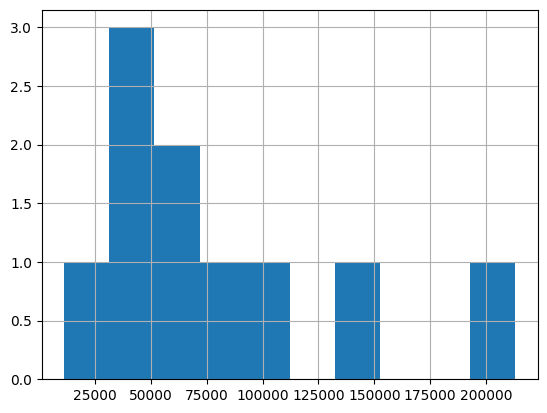

In [87]:
# Create a histogram of the Odometer column using hist()
car_sales_2["Odometer (KM)"].hist()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_36718/739377726.py:3: SyntaxWarning: invalid escape sequence '\$'
  car_sales_2["Price"] = car_sales_2["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int) #this will remove the $ and the , and change the data type to int


<Axes: >

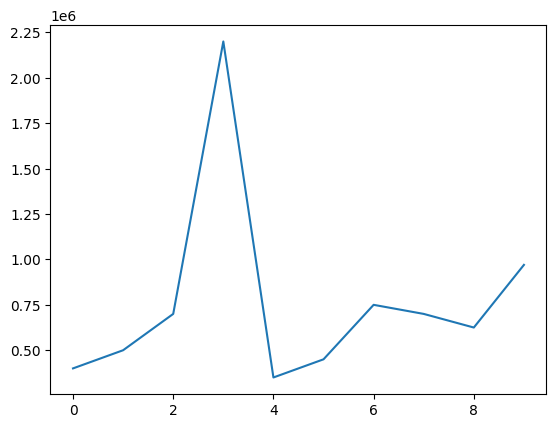

In [88]:
# Try to plot the Price column using plot()
#Remove the punctuation from price column
car_sales_2["Price"] = car_sales_2["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int) #this will remove the $ and the , and change the data type to int
car_sales_2["Price"].plot()

In [89]:
# Remove the two extra zeros at the end of the price column
car_sales_2["Price"] = car_sales_2["Price"] / 100
car_sales_2

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


In [90]:
#Lower the strings of the Make column
car_sales_2["Make"] = car_sales_2["Make"].str.lower()

In [91]:
# Import the car sales DataFrame with missing data ("../data/car-sales-missing-data.csv")
# Check out the new DataFrame
car_sales_2_missing = pd.read_csv("data/car-sales-missing-data.csv")
car_sales_2_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


In [92]:
# Fill the Odometer column missing values with the mean of the column inplace
car_sales_2_missing["Odometer"] = car_sales_2_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(numeric_only=True))

In [93]:
car_sales_2_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


In [94]:
# Remove the rest of the missing data inplace
car_sales_2_missing.dropna(inplace=True)

In [95]:
car_sales_2_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


In [96]:
#Create a "Seats" column where every row has a value of 5
car_sales_2_missing["Seats"] = 5
car_sales_2_missing

,Make,Colour,Odometer,Doors,Price,Seats
0,Toyota,White,150043.000000,4.0,"$4,000",5
1,Honda,Red,87899.000000,4.0,"$5,000",5
2,Toyota,Blue,92302.666667,3.0,"$7,000",5
3,BMW,Black,11179.000000,5.0,"$22,000",5
4,Nissan,White,213095.000000,4.0,"$3,500",5
5,Toyota,Green,92302.666667,4.0,"$4,500",5


In [97]:
# Create a column called "Engine Size" with random values between 1.3 and 4.5
# Remember: If you're doing it from a Python list, the list has to be the same length
# as the DataFrame

car_sales_2_missing["Engine Size"] = [1.3, 2.2 , 3.5, 4.0, 1.8, 3.9]
car_sales_2_missing

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size
0,Toyota,White,150043.000000,4.0,"$4,000",5,1.3
1,Honda,Red,87899.000000,4.0,"$5,000",5,2.2
2,Toyota,Blue,92302.666667,3.0,"$7,000",5,3.5
3,BMW,Black,11179.000000,5.0,"$22,000",5,4.0
4,Nissan,White,213095.000000,4.0,"$3,500",5,1.8
5,Toyota,Green,92302.666667,4.0,"$4,500",5,3.9


In [98]:
#Create a column which represents the price of a car per kilometer
#Then view the DataFrame

car_sales_2_missing["Price"] = car_sales_2_missing["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)
car_sales_2_missing["Price"] = car_sales_2_missing["Price"] / 100
car_sales_2_missing["Price per KM"] = car_sales_2_missing["Price"] / car_sales_2_missing["Odometer"]
car_sales_2_missing



<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/var/folders/69/6rjp6hcn2cn2ypx9h4gf_zlh0000gp/T/ipykernel_36718/2164756485.py:4: SyntaxWarning: invalid escape sequence '\$'
  car_sales_2_missing["Price"] = car_sales_2_missing["Price"].str.replace('[\$\,\.]', '', regex=True).astype(int)


,Make,Colour,Odometer,Doors,Price,Seats,Engine Size,Price per KM
0,Toyota,White,150043.000000,4.0,40.0,5,1.3,0.000267
1,Honda,Red,87899.000000,4.0,50.0,5,2.2,0.000569
2,Toyota,Blue,92302.666667,3.0,70.0,5,3.5,0.000758
3,BMW,Black,11179.000000,5.0,220.0,5,4.0,0.019680
4,Nissan,White,213095.000000,4.0,35.0,5,1.8,0.000164
5,Toyota,Green,92302.666667,4.0,45.0,5,3.9,0.000488


In [99]:
# Remove the last column you added using .drop()
car_sales_2_missing.drop("Price per KM", axis=1, inplace=True)
car_sales_2_missing

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size
0,Toyota,White,150043.000000,4.0,40.0,5,1.3
1,Honda,Red,87899.000000,4.0,50.0,5,2.2
2,Toyota,Blue,92302.666667,3.0,70.0,5,3.5
3,BMW,Black,11179.000000,5.0,220.0,5,4.0
4,Nissan,White,213095.000000,4.0,35.0,5,1.8
5,Toyota,Green,92302.666667,4.0,45.0,5,3.9


In [100]:
# Shuffle the DataFrame using sample() with the frac parameter set to 1
# Save the the shuffled DataFrame to a new variable

car_sales_2_missing_shuffled = car_sales_2_missing.sample(frac=1)

In [101]:
#Reset the indexes of the shuffled DataFrame
car_sales_2_missing_shuffled.reset_index(drop=True, inplace=True)
car_sales_2_missing_shuffled

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size
0,Toyota,Blue,92302.666667,3.0,70.0,5,3.5
1,Toyota,Green,92302.666667,4.0,45.0,5,3.9
2,Toyota,White,150043.000000,4.0,40.0,5,1.3
3,Honda,Red,87899.000000,4.0,50.0,5,2.2
4,BMW,Black,11179.000000,5.0,220.0,5,4.0
5,Nissan,White,213095.000000,4.0,35.0,5,1.8


In [102]:
# Change the Odometer values from kilometers to miles using a Lambda function
# Then view the DataFrame

car_sales_2_missing_shuffled["Odometer"] = car_sales_2_missing_shuffled["Odometer"].apply(lambda x: x / 1.6)
car_sales_2_missing_shuffled

,Make,Colour,Odometer,Doors,Price,Seats,Engine Size
0,Toyota,Blue,57689.166667,3.0,70.0,5,3.5
1,Toyota,Green,57689.166667,4.0,45.0,5,3.9
2,Toyota,White,93776.875000,4.0,40.0,5,1.3
3,Honda,Red,54936.875000,4.0,50.0,5,2.2
4,BMW,Black,6986.875000,5.0,220.0,5,4.0
5,Nissan,White,133184.375000,4.0,35.0,5,1.8


In [103]:
# Change the title of the Odometer (KM) to represent miles instead of kilometers

car_sales_2_missing_shuffled.rename(columns={"Odometer": "Odometer (Miles)"}, inplace=True)
car_sales_2_missing_shuffled

,Make,Colour,Odometer (Miles),Doors,Price,Seats,Engine Size
0,Toyota,Blue,57689.166667,3.0,70.0,5,3.5
1,Toyota,Green,57689.166667,4.0,45.0,5,3.9
2,Toyota,White,93776.875000,4.0,40.0,5,1.3
3,Honda,Red,54936.875000,4.0,50.0,5,2.2
4,BMW,Black,6986.875000,5.0,220.0,5,4.0
5,Nissan,White,133184.375000,4.0,35.0,5,1.8


### Numpy - Numerical Data

- Numpy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

- It uses vectorization via broadcasting (avoiding loops) to optimize performance. 

- Numpy is the backbone of other Python scientific packages.

In [104]:
import numpy as np

#### Data Types & Attributes

- NumPys' main datatype is ndarray (n-dimensional array).

In [105]:
a1 = np.array([1,2,3])
a1


array([1, 2, 3])

In [106]:
type(a1)

numpy.ndarray

In [107]:
a2 = np.array([[1,2,3,],
               [4,5,6]])

a3 = np.array([[[1,2,3],
                [4,5,6],
                [7,8,9]],
                [[10,11,12],
                 [13,14,15],
                 [16,17,18]]])

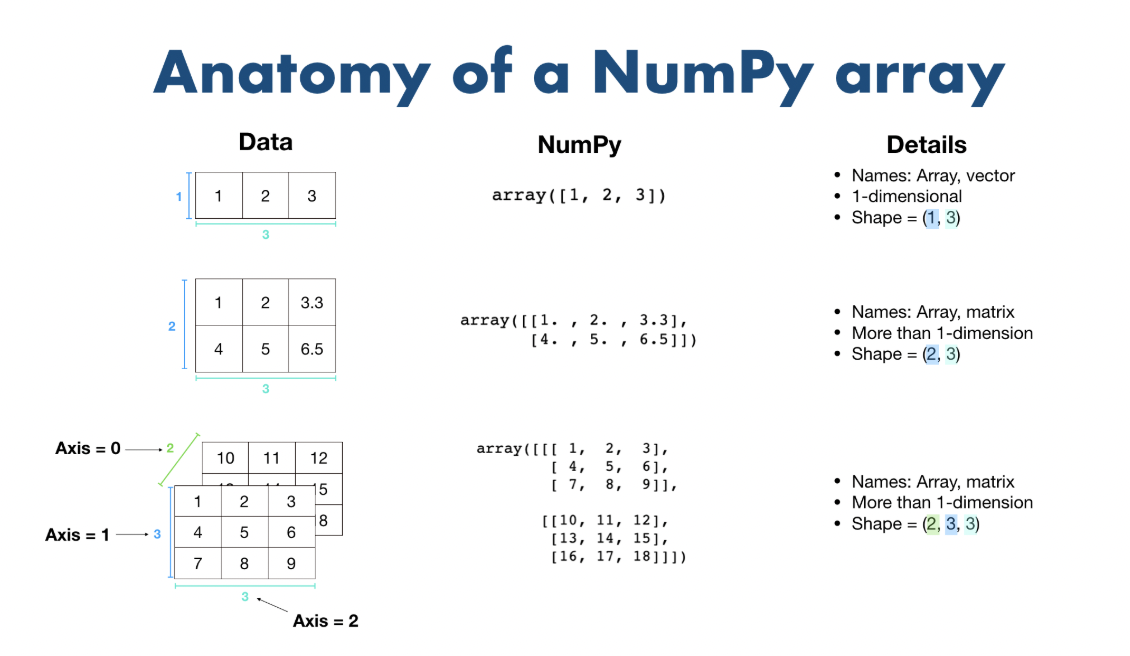

In [108]:
from PIL import Image
img = Image.open('/Users/EfePersonal/Documents/ml-statistics-linear_algebra/Screenshot 2025-01-31 at 07.24.00.png')
img

In [109]:
a2

array([[1, 2, 3],
       [4, 5, 6]])

In [110]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

- Vector is a 1-dimensional array and matrix is a 2-dimensional array.

In [111]:
#Attributes
a1.shape

(3,)

In [112]:
a2.shape

(2, 3)

In [113]:
a3.shape #3 dimensions

(2, 3, 3)

In [114]:
a1.ndim, a2.ndim, a3.ndim #number of dimensions

(1, 2, 3)

In [115]:
a1.dtype, a2.dtype, a3.dtype #int32 is the default data type

(dtype('int64'), dtype('int64'), dtype('int64'))

In [116]:
a1.size, a2.size, a3.size #number of elements

(3, 6, 18)

In [117]:
type(a1), type(a2), type(a3)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

#### Create a DataFrame from a Numpy array

In [118]:
import pandas as pd
df = pd.DataFrame(a2)
df

,0,1,2
0,1,2,3
1,4,5,6


In [119]:
sample_array = np.array([1,2,3])
sample_array

array([1, 2, 3])

In [120]:
ones = np.ones((2,3)) #creates an array of ones
ones

array([[1., 1., 1.],
       [1., 1., 1.]])

In [121]:
zeros = np.zeros((2,3)) #creates an array of zeros
zeros

array([[0., 0., 0.],
       [0., 0., 0.]])

In [122]:
range_array = np.arange(0, 10, 2) #start, stop, step
range_array

array([0, 2, 4, 6, 8])

In [123]:
random_array = np.random.randint(0, 10, size=(3,5)) #random integers between 0 and 10, with a shape of 3x5
random_array

array([[3, 2, 6, 5, 4],
       [5, 4, 7, 1, 1],
       [4, 6, 6, 1, 7]])

In [124]:
random_array_2 = np.random.random((5,3)) #random floats between 0 and 1
random_array_2

array([[0.46261705, 0.92946923, 0.37636836],
       [0.98618887, 0.61510763, 0.67392983],
       [0.72424108, 0.00512877, 0.84534887],
       [0.32817121, 0.49494387, 0.03811534],
       [0.78578417, 0.07414535, 0.81035521]])

In [125]:
random_array_3 = np.random.rand(5,3) #random floats between 0 and 1
random_array_3

array([[0.31393205, 0.04491364, 0.62693066],
       [0.255196  , 0.26366467, 0.81221787],
       [0.28804645, 0.41143149, 0.35196201],
       [0.66997786, 0.88524032, 0.15792275],
       [0.45017027, 0.22401399, 0.82906464]])

In [126]:
#Numpy Random Seed
## So when Numpy is generating random numbers, it is actually generating pseudo-random numbers
np.random.seed(seed=0) 

random_array_4 = np.random.randint(10, size=(5,3))
random_array_4

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2],
       [4, 7, 6],
       [8, 8, 1]])

- What if we wanted to share our notebook with someone else and we wanted them to run our cells across a notebook, go thorugh from top to bottom and get exactly the same results as what we did so we can reproduce our experiments?
- That's when random seed comes in. It allows us to still generate random numbers, but random numbers that are reproducible.
- When we set a random seed, we're telling NumPy to use the same random number generation process each time it runs. **And this works whatever the seed is.**

#### Viewing Arrays and Matrices

In [127]:
np.unique(random_array_4) #shows the unique values

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [128]:
a1


array([1, 2, 3])

In [129]:
a1[0]

np.int64(1)

In [130]:
a2

array([[1, 2, 3],
       [4, 5, 6]])

In [131]:
a2[0]

array([1, 2, 3])

In [132]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

In [133]:
a3[0]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [134]:
a3.shape

(2, 3, 3)

- Usually a one dimensional array is referred to as a **vector**, buty anything more than one-dimensional is referred to as a **matrix**.

In [135]:
a2[1]

array([4, 5, 6])

In [136]:
a3[:2, :2, :2] #slicing, we are taking the first two elements of the first two dimensions

array([[[ 1,  2],
        [ 4,  5]],

       [[10, 11],
        [13, 14]]])

In [137]:
a4 = np.random.randint(10, size=(2,3,4,5))
a4

array([[[[6, 7, 7, 8, 1],
         [5, 9, 8, 9, 4],
         [3, 0, 3, 5, 0],
         [2, 3, 8, 1, 3]],

        [[3, 3, 7, 0, 1],
         [9, 9, 0, 4, 7],
         [3, 2, 7, 2, 0],
         [0, 4, 5, 5, 6]],

        [[8, 4, 1, 4, 9],
         [8, 1, 1, 7, 9],
         [9, 3, 6, 7, 2],
         [0, 3, 5, 9, 4]]],


       [[[4, 6, 4, 4, 3],
         [4, 4, 8, 4, 3],
         [7, 5, 5, 0, 1],
         [5, 9, 3, 0, 5]],

        [[0, 1, 2, 4, 2],
         [0, 3, 2, 0, 7],
         [5, 9, 0, 2, 7],
         [2, 9, 2, 3, 3]],

        [[2, 3, 4, 1, 2],
         [9, 1, 4, 6, 8],
         [2, 3, 0, 0, 6],
         [0, 6, 3, 3, 8]]]])

In [138]:
a4.shape, a4.ndim

((2, 3, 4, 5), 4)

- In the above matrix a4, 5 is the number of columns, 4 is the rows, and 3 is the number of dimensions and 2 says two of these 3 dimensions.

In [139]:
a5 = np.random.randint(10, size=(3,4,5,5))
a5

array([[[[8, 8, 2, 3, 2],
         [0, 8, 8, 3, 8],
         [2, 8, 4, 3, 0],
         [4, 3, 6, 9, 8],
         [0, 8, 5, 9, 0]],

        [[9, 6, 5, 3, 1],
         [8, 0, 4, 9, 6],
         [5, 7, 8, 8, 9],
         [2, 8, 6, 6, 9],
         [1, 6, 8, 8, 3]],

        [[2, 3, 6, 3, 6],
         [5, 7, 0, 8, 4],
         [6, 5, 8, 2, 3],
         [9, 7, 5, 3, 4],
         [5, 3, 3, 7, 9]],

        [[9, 9, 7, 3, 2],
         [3, 9, 7, 7, 5],
         [1, 2, 2, 8, 1],
         [5, 8, 4, 0, 2],
         [5, 5, 0, 8, 1]]],


       [[[1, 0, 3, 8, 8],
         [4, 4, 0, 9, 3],
         [7, 3, 2, 1, 1],
         [2, 1, 4, 2, 5],
         [5, 5, 2, 5, 7]],

        [[7, 6, 1, 6, 7],
         [2, 3, 1, 9, 5],
         [9, 9, 2, 0, 9],
         [1, 9, 0, 6, 0],
         [4, 8, 4, 3, 3]],

        [[8, 8, 7, 0, 3],
         [8, 7, 7, 1, 8],
         [4, 7, 0, 4, 9],
         [0, 6, 4, 2, 4],
         [6, 3, 3, 7, 8]],

        [[5, 0, 8, 5, 4],
         [7, 4, 1, 3, 3],
         [9, 2, 5, 2, 

In [140]:
#Get the first 4 numbers of the inner most arrays
a4[:, :, :, :1]

array([[[[6],
         [5],
         [3],
         [2]],

        [[3],
         [9],
         [3],
         [0]],

        [[8],
         [8],
         [9],
         [0]]],


       [[[4],
         [4],
         [7],
         [5]],

        [[0],
         [0],
         [5],
         [2]],

        [[2],
         [9],
         [2],
         [0]]]])

#### Manipulating and Comparing Arrays
##### Arithmetic 

In [141]:
a1

array([1, 2, 3])

In [142]:
a2

array([[1, 2, 3],
       [4, 5, 6]])

In [143]:
ones

array([[1., 1., 1.],
       [1., 1., 1.]])

In [144]:
a1 + ones

array([[2., 3., 4.],
       [2., 3., 4.]])

In [145]:
a1 - ones

array([[0., 1., 2.],
       [0., 1., 2.]])

In [146]:
a1 * ones

array([[1., 2., 3.],
       [1., 2., 3.]])

In [147]:
a1 * a2

array([[ 1,  4,  9],
       [ 4, 10, 18]])

In [148]:
a2 = a2.reshape(2,3,1)
a2.shape
a2

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [149]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

In [150]:
#how can you reshape a2 to be compatible with a3
#search: "how to reshape numpy array" # check above for the answer
a2 * a3

array([[[  1,   2,   3],
        [  8,  10,  12],
        [ 21,  24,  27]],

       [[ 40,  44,  48],
        [ 65,  70,  75],
        [ 96, 102, 108]]])

- In a1 * a2, the smaller array is broadcasted across the larger array, so they have compatible shapes. Because when we have a 1,3 array and a 2,3 array, the one row array is being broadcasted across the two row array. First the first row and then the second row.

In [151]:
a1 / ones

array([[1., 2., 3.],
       [1., 2., 3.]])

In [152]:
#floor division removes the decimals
a2 // a1

array([[[1, 0, 0],
        [2, 1, 0],
        [3, 1, 1]],

       [[4, 2, 1],
        [5, 2, 1],
        [6, 3, 2]]])

In [153]:
a2 ** 2


array([[[ 1],
        [ 4],
        [ 9]],

       [[16],
        [25],
        [36]]])

In [154]:
np.square(a2)

array([[[ 1],
        [ 4],
        [ 9]],

       [[16],
        [25],
        [36]]])

In [155]:
np.add(a1, ones)

array([[2., 3., 4.],
       [2., 3., 4.]])

In [156]:
a1 % 2

array([1, 0, 1])

In [157]:
a1

array([1, 2, 3])

In [158]:
np.exp(a1) #exponential

array([ 2.71828183,  7.3890561 , 20.08553692])

In [159]:
np.log(a1) #natural logarithm

array([0.        , 0.69314718, 1.09861229])

##### Aggregation
- Aggregation is performing the same operation on a number of things.
- Regarding methods like `sum()`: use Python's methods on Python datatypes and use NumPy's methods on NumPy arrays (`np.sum()`).


In [161]:
massive_array = np.random.random(100000)
massive_array.size

100000

In [163]:
massive_array[:100]

array([0.44201532, 0.85263492, 0.43343897, 0.82687037, 0.50934207,
       0.08637698, 0.66003986, 0.20659461, 0.84727532, 0.68135913,
       0.17836735, 0.06985902, 0.00968817, 0.89204966, 0.13346521,
       0.77919197, 0.92516343, 0.71517875, 0.49081861, 0.4694983 ,
       0.88270929, 0.48841006, 0.41456749, 0.17411195, 0.47528944,
       0.78364797, 0.55642943, 0.15986708, 0.14382937, 0.64946303,
       0.5392236 , 0.32568477, 0.14701389, 0.15987007, 0.12941234,
       0.57892239, 0.09226017, 0.91054472, 0.08297175, 0.80037846,
       0.87713097, 0.09345946, 0.42630588, 0.47322067, 0.58019711,
       0.71624417, 0.02706898, 0.73139734, 0.76696351, 0.00976644,
       0.30828617, 0.23286547, 0.50342743, 0.95372138, 0.5578113 ,
       0.09746869, 0.62167849, 0.86302262, 0.15763228, 0.99242952,
       0.08500107, 0.09445791, 0.63360789, 0.94929747, 0.93674647,
       0.44737829, 0.72769634, 0.74223798, 0.30698606, 0.11977135,
       0.44387868, 0.39177432, 0.53184918, 0.84535768, 0.53627

In [164]:
%timeit sum(massive_array) #python's sum

4.21 ms ± 142 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [165]:
%timeit np.sum(massive_array) #numpy's sum

20.8 μs ± 1.08 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [166]:
a2

array([[[1],
        [2],
        [3]],

       [[4],
        [5],
        [6]]])

In [167]:
np.mean(a2)

np.float64(3.5)

In [168]:
np.max(a2)

np.int64(6)

In [169]:
np.min(a2)

np.int64(1)

In [172]:
#Standard Deviation: a measure of how spread out a group of numbers is from the mean
np.std(a2)

np.float64(1.707825127659933)

In [173]:
#Variance = measure of the average degree to which each number is different to the mean
#Higher variences = wider range of numbers
#Lower variance = lower range of numbers
np.var(a2)

np.float64(2.9166666666666665)

In [174]:
np.sqrt(np.var(a2)) #standard deviation = square root of variance

np.float64(1.707825127659933)

(array([10085.,  9954.,  9967.,  9920., 10057., 10021., 10001., 10072.,
        10060.,  9863.]),
 array([4.01168557e-06, 1.00003547e-01, 2.00003083e-01, 3.00002619e-01,
        4.00002155e-01, 5.00001690e-01, 6.00001226e-01, 7.00000762e-01,
        8.00000297e-01, 8.99999833e-01, 9.99999369e-01]),
 <BarContainer object of 10 artists>)

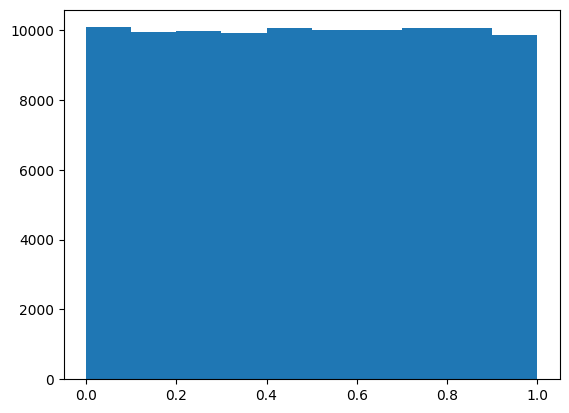

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(massive_array)

##### Reshaping and Transposing
- Reshaping is changing the shape of an array.
- Transposing is switching the axis of an array.

- When operating on tow arrays, NumPy compares their shapes element-wise. It starts with the trailing dimensions and works it was forward. Two dimensions are compatible when:
1. They are equal or
2. One of them is 1.

In [ ]:
#Reshaping
a2_new = np.random.randint(10, size=(2,3))
a2_new.shape

(2, 3)

In [187]:
a2_new

array([[6, 7, 0],
       [4, 8, 7]])

In [182]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

In [183]:
a3.shape

(2, 3, 3)

In [188]:
#a2_new*a3

## How can we reshape a2_new to be compatible with a3

In [189]:
#reshape a2_new to be compatible with a3
a2_new.reshape(2,3,1)

array([[[6],
        [7],
        [0]],

       [[4],
        [8],
        [7]]])

In [191]:
#So to create the a2_new as the same shape as a3, we need to create a new a2_new matrice
a2_new_reshape = a2_new.reshape(2,3,1)

In [192]:
a2_new_reshape * a3

array([[[  6,  12,  18],
        [ 28,  35,  42],
        [  0,   0,   0]],

       [[ 40,  44,  48],
        [104, 112, 120],
        [112, 119, 126]]])

- So we use reshape when we have a mismatch in the number of elements in the arrays.

In [196]:
#Transpose - switches the axis
a2_new.T

array([[6, 4],
       [7, 8],
       [0, 7]])

In [197]:
a2_new.T.shape

(3, 2)

In [198]:
a3

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

In [199]:
a3.T

array([[[ 1, 10],
        [ 4, 13],
        [ 7, 16]],

       [[ 2, 11],
        [ 5, 14],
        [ 8, 17]],

       [[ 3, 12],
        [ 6, 15],
        [ 9, 18]]])

- The important difference here between transpose and reshape if that transpose just flips the axes around, while reshape changes the (custom) shape of the array.

##### Dot Product and Element-Wise
- One of the main use cases for transposing a matrix is the DOT product.

In [200]:
np.random.seed(0)
mat1 = np.random.randint(10, size=(5,3))
mat2 = np.random.randint(10, size=(5,3))

mat1

array([[5, 0, 3],
       [3, 7, 9],
       [3, 5, 2],
       [4, 7, 6],
       [8, 8, 1]])

In [201]:
mat2

array([[6, 7, 7],
       [8, 1, 5],
       [9, 8, 9],
       [4, 3, 0],
       [3, 5, 0]])

In [ ]:
#Element-Wise Multiplication
mat1 * mat2

array([[30,  0, 21],
       [24,  7, 45],
       [27, 40, 18],
       [16, 21,  0],
       [24, 40,  0]])

- For the dot product to happen. The numbers on the inside must match. For example, if there is a 3x3 and one 3x2 matrix. The 3s must match.

- So for a dot product to happen between two matrices, the inner dimensions must match. And the resulting matrix will have the shape of the outer dimensions.

In [ ]:
#Dot Product
#np.dot(mat1, mat2) 

# #this will give an error because the shapes are not compatible since the numbers on the inside of the matrices are not matching

In [207]:
#we will transpose mat1 to make the shapes compatible
mat1.T

array([[5, 3, 3, 4, 8],
       [0, 7, 5, 7, 8],
       [3, 9, 2, 6, 1]])

In [210]:
mat1.shape, mat2.T.shape

((5, 3), (3, 5))

In [211]:
mat3 = np.dot(mat1, mat2.T)
mat3

array([[ 51,  55,  72,  20,  15],
       [130,  76, 164,  33,  44],
       [ 67,  39,  85,  27,  34],
       [115,  69, 146,  37,  47],
       [111,  77, 145,  56,  64]])